**Alunos:**

*   Lucas de Lima da Silva - 121110517
*   Gabriel Dantas de Oliveira - 121110669
*   Paulo Sérgio de Sousa Nunes - 120110385
*   Paulo Hernane Fontes e Silva - 119210311
*   Item da lista

Link para o [documento](https://docs.google.com/document/d/1o-HIZWwrZ3_VeMnCq1Coj6HYIZybBxAvWg4JurGYHew/edit)

Link para o [dataset](https://drive.google.com/file/d/1wKhrJ9jHNCWtTgVRl_3Mmo0aTgPlcC1W/view?usp=drive_link)

In [19]:
# Imports
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [20]:
dataset = pd.read_csv("https://drive.google.com/uc?export=download&id=18o1i9FzurU0JyOIO6xaRZYOovSAmiEy-", sep=',')

dataset.head()

,Country,CountryCode,Year,10 mbps and over,Between 2 mbps and 10 mbps,Between 256 kbps and 2 mbps
0,Afghanistan,AFG,2015,350.00,164.00,6553.00
1,Afghanistan,AFG,2020,360.00,867.00,25343.00
2,Algeria,DZA,2015,531.00,763014.00,1073883.00
3,Algeria,DZA,2020,1214052.00,2570405.00,6002.00
4,Andorra,AND,2015,30694.00,0.00,0.00


In [21]:
# Visualização 1 abaixo

In [22]:
pip install pycountry pycountry-convert

In [23]:
import pycountry
import pycountry_convert as pc

def get_continent(country_code):
    try:
        country_alpha2 = pycountry.countries.get(alpha_3=country_code).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continents = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'OC': 'Oceania',
            'SA': 'South America'
        }
        return continents[continent_code]
    except Exception as e:
        return None

dataset['Continent'] = dataset['CountryCode'].apply(get_continent)

In [24]:
dataset

,Country,CountryCode,Year,10 mbps and over,Between 2 mbps and 10 mbps,Between 256 kbps and 2 mbps,Continent
0,Afghanistan,AFG,2015,350.00,164.00,6553.00,Asia
1,Afghanistan,AFG,2020,360.00,867.00,25343.00,Asia
2,Algeria,DZA,2015,531.00,763014.00,1073883.00,Africa
3,Algeria,DZA,2020,1214052.00,2570405.00,6002.00,Africa
4,Andorra,AND,2015,30694.00,0.00,0.00,Europe
...,...,...,...,...,...,...,...
283,Vietnam,VNM,2020,16611978.00,65205.00,22066.00,Asia
284,Zambia,ZMB,2015,847.00,1133.00,21410.00,Africa
285,Zambia,ZMB,2020,329.00,63779.00,18209.00,Africa
286,Zimbabwe,ZWE,2015,1781.00,13083.00,149123.00,Africa


In [25]:
grouped = dataset.groupby(['Year', 'Continent'])

In [26]:
pd.options.display.float_format = '{:.2f}'.format

grouped = dataset.groupby(['Year', 'Continent'])[['10 mbps and over', 'Between 2 mbps and 10 mbps', 'Between 256 kbps and 2 mbps']].mean()

In [27]:
grouped

10 mbps and over  Between 2 mbps and 10 mbps  \
Year Continent                                                     
2015 Africa                 30480.88                   159250.77   
     Asia                 6508178.73                  3882220.89   
     Europe               3517451.81                  1002280.77   
     North America        7723216.85                  1769516.31   
     Oceania               208831.43                   318760.57   
     South America        1060036.00                  2818687.12   
2020 Africa                436433.75                   208895.77   
     Asia                16521158.77                   874507.81   
     Europe               5502117.54                   376738.09   
     North America        9439152.31                   635037.31   
     Oceania              2029510.00                     1059.67   
     South America        4830304.00                  1328204.80   

                    Between 256 kbps and 2 mbps  
Year Continent                                   
2015 Africa                           178304.52  
     Asia                             640747.82  
     Europe                           133077.12  
     North America                    459506.43  
     Oceania                           28285.17  
     South America                   1621976.00  
2020 Africa                            20661.05  
     Asia                             463165.53  
     Europe                            69915.29  
     North America                    164908.86  
     Oceania                             530.33  
     South America                    473184.45

<ipython-input-28-3cbb9b8927d4>:18: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(ymin, ymax)


<Figure size 1400x800 with 0 Axes>

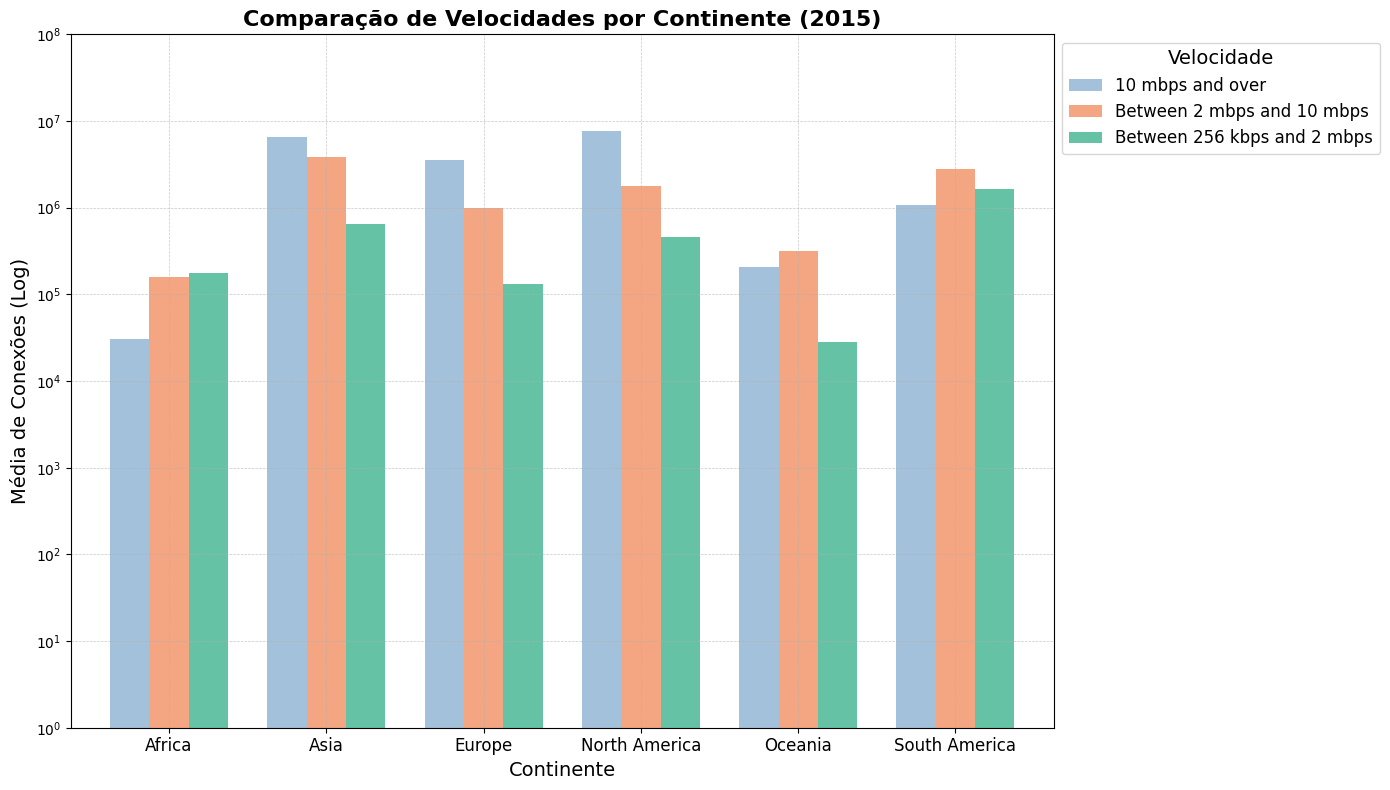

<ipython-input-28-3cbb9b8927d4>:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(ymin, ymax)


<Figure size 1400x800 with 0 Axes>

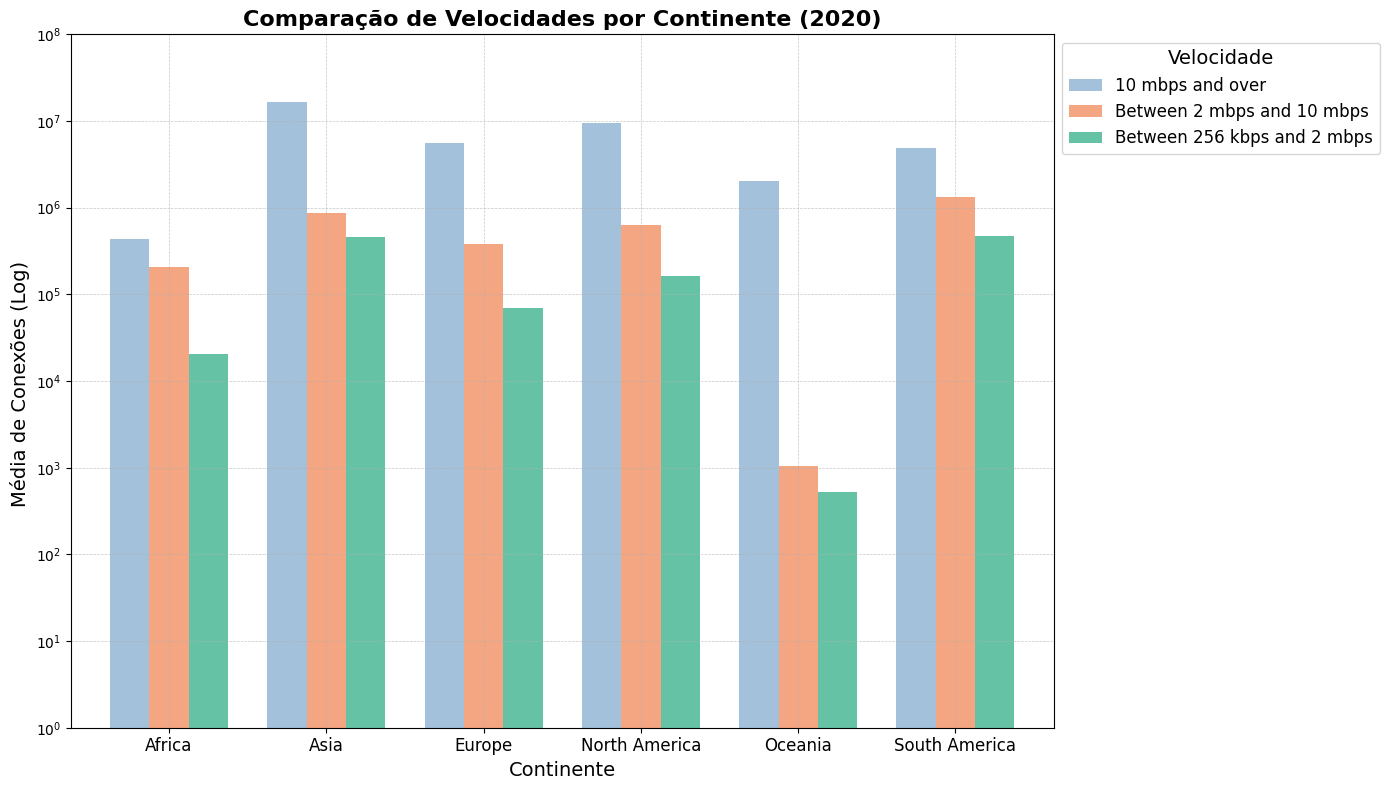

In [28]:
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

grouped = dataset.groupby(['Year', 'Continent'])[['10 mbps and over', 'Between 2 mbps and 10 mbps', 'Between 256 kbps and 2 mbps']].mean()

data_2015 = grouped.loc[2015]
data_2020 = grouped.loc[2020]

ymin, ymax = 0, 10**8

colors = ['#a3c1da', '#f4a582', '#66c2a5']

plt.figure(figsize=(14, 8))
ax1 = data_2015.plot(kind='bar', width=0.75, logy=True, color=colors, figsize=(14, 8))

ax1.set_ylim(ymin, ymax)
ax1.set_yticks([10**i for i in range(0, 9)])  # Define os ticks como potências de 10
ax1.set_yticklabels([f'$10^{i}$' for i in range(0, 9)])  # Define os rótulos dos ticks
ax1.set_title('Comparação de Velocidades por Continente (2015)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Continente', fontsize=14)
ax1.set_ylabel('Média de Conexões (Log)', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
ax1.legend(title='Velocidade', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
ax2 = data_2020.plot(kind='bar', width=0.75, logy=True, color=colors, figsize=(14, 8))

ax2.set_ylim(ymin, ymax)
ax2.set_yticks([10**i for i in range(0, 9)])  # Define os ticks como potências de 10
ax2.set_yticklabels([f'$10^{i}$' for i in range(0, 9)])  # Define os rótulos dos ticks
ax2.set_title('Comparação de Velocidades por Continente (2020)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Continente', fontsize=14)
ax2.set_ylabel('Média de Conexões (Log) ', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12)
ax2.legend(title='Velocidade', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


In [29]:
# Visualização 2 abaixo

<ipython-input-30-0ae270d9f073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2015['Max Connections'] = df2015[["10 mbps and over", "Between 2 mbps and 10 mbps", "Between 256 kbps and 2 mbps"]].idxmax(axis=1)
<ipython-input-30-0ae270d9f073>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


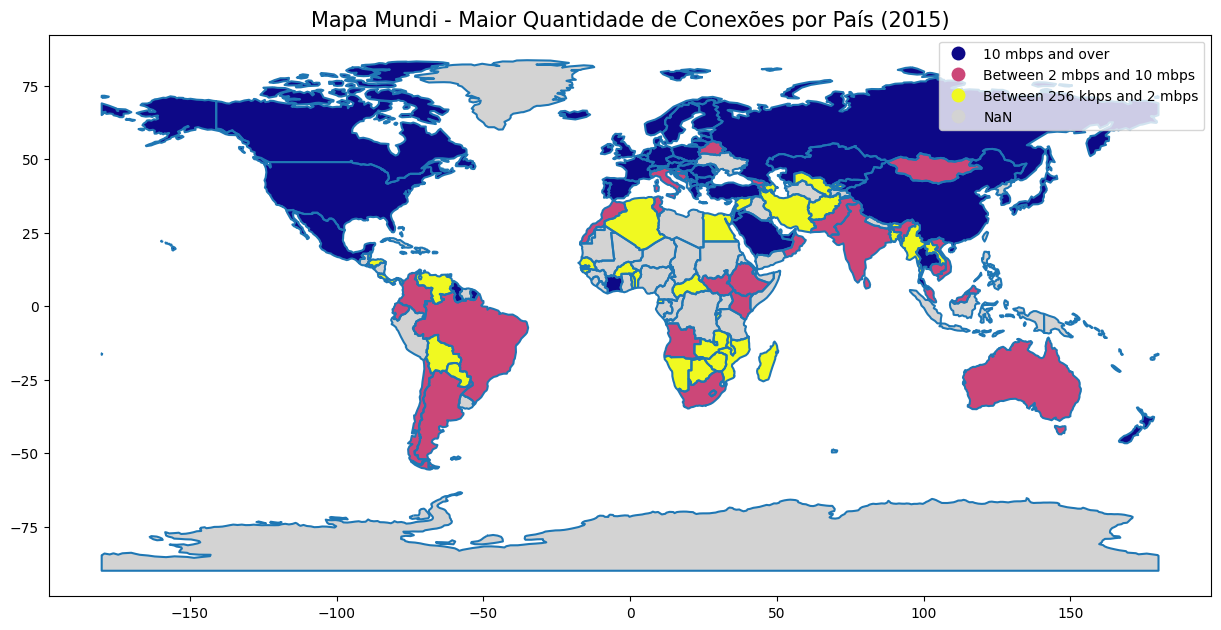

In [30]:
df2015 = dataset[dataset['Year'] == 2015]

df2015['Max Connections'] = df2015[["10 mbps and over", "Between 2 mbps and 10 mbps", "Between 256 kbps and 2 mbps"]].idxmax(axis=1)

# Carregar o mapa-múndi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Combinar os dados com o mapa usando o código do país
world = world.merge(df2015, how="left", left_on="iso_a3", right_on="CountryCode")

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Max Connections', ax=ax, legend=True,
           cmap='plasma', missing_kwds={"color": "lightgrey"})

# Adicionar título
plt.title('Mapa Mundi - Maior Quantidade de Conexões por País (2015)', fontsize=15)

# Exibir o gráfico
plt.show()

<ipython-input-31-ba147550dbb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['Max Connections'] = df2020[["10 mbps and over", "Between 2 mbps and 10 mbps", "Between 256 kbps and 2 mbps"]].idxmax(axis=1)
<ipython-input-31-ba147550dbb7>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


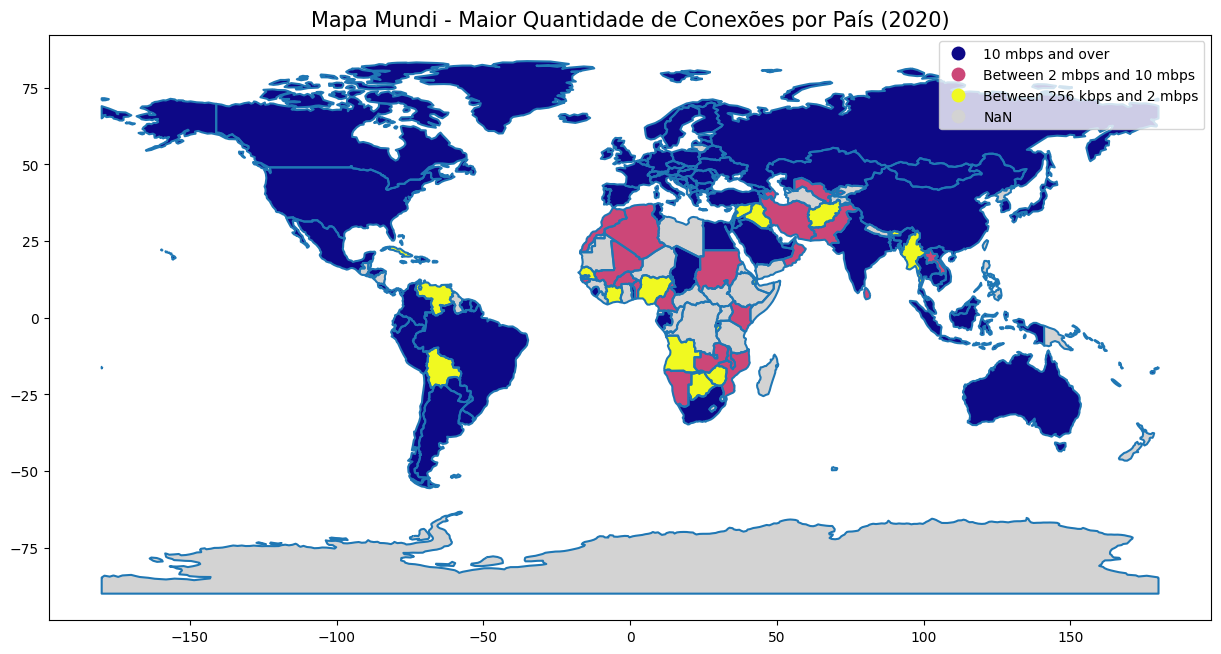

In [31]:
# get only the 2020 data
df2020 = dataset[dataset['Year'] == 2020]

df2020['Max Connections'] = df2020[["10 mbps and over", "Between 2 mbps and 10 mbps", "Between 256 kbps and 2 mbps"]].idxmax(axis=1)

# Carregar o mapa-múndi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Combinar os dados com o mapa usando o código do país
world = world.merge(df2020, how="left", left_on="iso_a3", right_on="CountryCode")

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Max Connections', ax=ax, legend=True,
           cmap='plasma', missing_kwds={"color": "lightgrey"})

# Adicionar título
plt.title('Mapa Mundi - Maior Quantidade de Conexões por País (2020)', fontsize=15)

# Exibir o gráfico
plt.show()
